1. Affichage des données

RAW RECIPES
----------------------------------------------------------------------------------------------

In [3]:
# === Imports & configuration ===
from pathlib import Path

import pandas as pd
from pprint import pprint
from IPython.display import display

# Pour un affichage plus lisible
pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 160)

# Définir le dossier des données (relatif au notebook)
DATA_DIR = Path("Data")
FILE = "RAW_recipes.csv"
FILEPATH = DATA_DIR / FILE

# Vérification du chemin
if not FILEPATH.exists():
    raise FileNotFoundError(f"Fichier introuvable : {FILEPATH.resolve()}")

# === Chargement du fichier ===
df_users = pd.read_csv(FILEPATH, low_memory=False)

# === Infos générales ===
print(f"Fichier : {FILE}")
print(f"Shape : {df_users.shape[0]} lignes × {df_users.shape[1]} colonnes\n")

print("Colonnes :")
pprint(list(df_users.columns))

print("\nTypes de données :")
print(df_users.dtypes)

# === Aperçu des premières lignes ===
display(df_users.head(20))

# === Stats rapides sur quelques colonnes clés ===
for col in ["user_id", "name", "n_recipes", "n_reviews", "n_interactions"]:
    if col in df_users.columns:
        print(f"\nValue counts pour '{col}' (top 10) :")
        print(df_users[col].value_counts(dropna=False).head(10))

Fichier : RAW_recipes.csv
Shape : 2 lignes × 1 colonnes

Colonnes :
['version https://git-lfs.github.com/spec/v1']

Types de données :
version https://git-lfs.github.com/spec/v1    object
dtype: object


,version https://git-lfs.github.com/spec/v1
0,oid sha256:6a8136d1da9e03396a9f52d72200b3fddb8...
1,size 294520189


In [4]:
import ast
from collections import Counter

# Lecture du fichier
df_recipes = pd.read_csv("Data/raw_recipes.csv")

# Conversion de la colonne 'tags' en vraie liste Python
df_recipes['tags_list'] = df_recipes['tags'].apply(
    lambda x: ast.literal_eval(x) if pd.notnull(x) else []
)

# Aplatir tous les tags dans une seule liste
all_tags = [tag for tags in df_recipes['tags_list'] for tag in tags]

# Compter les occurrences de chaque tag
tag_counts = Counter(all_tags)

# Convertir en DataFrame
df_tags = pd.DataFrame(tag_counts.items(), columns=['Tag', 'Occurrences'])

# Filtrer les tags avec au moins 50 occurrences
df_tags_filtre = df_tags[df_tags['Occurrences'] >= 15000].sort_values(by='Occurrences', ascending=False)

# Résultat
print(f"🏷️ Nombre de tags avec au moins 5000 occurrences : {len(df_tags_filtre)}\n")
display(df_tags_filtre.head(20))  # top 20 pour aperçu


KeyError: 'tags'

Tags des utilisateurs les plus actifs

RAW INTERACTIONS
---------------------------------------------------------------------------------------------

In [ ]:
# Pour un affichage plus lisible
pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 160)

# Définir le dossier des données (relatif au notebook)
DATA_DIR = Path("Data")
FILE = "RAW_interactions.csv"
FILEPATH = DATA_DIR / FILE

# Vérification du chemin
if not FILEPATH.exists():
    raise FileNotFoundError(f"Fichier introuvable : {FILEPATH.resolve()}")

# === Chargement du fichier ===
df_interactions = pd.read_csv(FILEPATH, low_memory=False)

# === Infos générales ===
print(f"Fichier : {FILE}")
print(f"Shape : {df_interactions.shape[0]} lignes × {df_interactions.shape[1]} colonnes\n")

print("Colonnes :")
pprint(list(df_interactions.columns))

print("\nTypes de données :")
print(df_interactions.dtypes)

# === Aperçu des premières lignes ===
display(df_interactions.head(20))

# === Stats rapides sur quelques colonnes clés ===
for col in ["user_id", "name", "n_recipes", "n_reviews", "n_interactions"]:
    if col in df_interactions.columns:
        print(f"\nValue counts pour '{col}' (top 10) :")
        print(df_interactions[col].value_counts(dropna=False).head(10))


Fichier : RAW_interactions.csv
Shape : 1132367 lignes × 5 colonnes

Colonnes :
['user_id', 'recipe_id', 'date', 'rating', 'review']

Types de données :
user_id       int64
recipe_id     int64
date         object
rating        int64
review       object
dtype: object


,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."
5,52282,120345,2005-05-21,4,very very sweet. after i waited the 2 days i b...
6,124416,120345,2011-08-06,0,"Just an observation, so I will not rate. I fo..."
7,2000192946,120345,2015-05-10,2,This recipe was OVERLY too sweet. I would sta...
8,76535,134728,2005-09-02,4,Very good!
9,273745,134728,2005-12-22,5,Better than the real!!



Value counts pour 'user_id' (top 10) :
user_id
424680    7671
37449     5603
383346    4628
169430    4076
128473    3917
89831     3353
58104     3288
133174    3107
199848    3018
305531    2902
Name: count, dtype: int64


Données manquantes et formats RAW_interactions.csv

In [ ]:
import pandas as pd
from IPython.display import display

print("\nVérification du format des colonnes :")

# Copie pour manipulation
df_temp = df_interactions.copy()
total_rows = len(df_temp)

# Préparer un dictionnaire pour stocker les infos
report = {
    'Type': [],
    'Valeurs manquantes': [],
    'Valeurs au mauvais format': [],
    '% mauvais format': []
}

for col in df_temp.columns:
    dtype = df_temp[col].dtype
    n_missing = df_temp[col].isna().sum()
    n_bad = 0

    # Vérification spécifique selon le type attendu
    if dtype == 'object':
        # Cas spécial : si la colonne semble contenir des dates
        if 'date' in col.lower():
            test = pd.to_datetime(df_temp[col], errors='coerce')
            n_bad = test.isna().sum() - n_missing
        # Autres colonnes texte → difficile de juger, donc on met 0
        else:
            n_bad = 0
    elif dtype in ['int64', 'float64']:
        # Vérifie s’il y a des valeurs non convertibles (ex: texte)
        coerced = pd.to_numeric(df_temp[col], errors='coerce')
        n_bad = coerced.isna().sum() - n_missing
    else:
        # Pour dtypes spéciaux, on ne traite pas ici
        n_bad = 0

    report['Type'].append(dtype)
    report['Valeurs manquantes'].append(n_missing)
    report['Valeurs au mauvais format'].append(n_bad)
    report['% mauvais format'].append(round(n_bad / total_rows * 100, 2))

# Créer le DataFrame récapitulatif
interactions_types = pd.DataFrame(report, index=df_temp.columns)
display(interactions_types)






Vérification du format des colonnes :


,Type,Valeurs manquantes,Valeurs au mauvais format,% mauvais format
user_id,int64,0,0,0.0
recipe_id,int64,0,0,0.0
date,object,0,0,0.0
rating,int64,0,0,0.0
review,object,169,0,0.0


Dates non conformes dans RAW_recipes.csv

In [ ]:
# Vérification date---------------------------------------------------------------------------
import re

# Fonction de détection du format
def detect_date_format(date_str):
    if pd.isna(date_str): 
        return "NaN"
    date_str = str(date_str).strip()

    if re.match(r'^\d{4}-\d{2}-\d{2}$', date_str):
        return "YYYY-MM-DD"
    elif re.match(r'^\d{2}/\d{2}/\d{4}$', date_str):
        return "DD/MM/YYYY"
    elif re.match(r'^\d{2}-\d{2}-\d{4}$', date_str):
        return "DD-MM-YYYY"
    elif re.match(r'^[A-Za-z]{3,9} \d{1,2}, \d{4}$', date_str):
        return "Month DD, YYYY"
    elif re.match(r'^\d{8}$', date_str):
        return "YYYYMMDD"
    else:
        return "Autre / Inconnu"

# Appliquer la fonction à la colonne 'date'
formats_detectes = df_interactions['date'].astype(str).apply(detect_date_format)

# Identifier les lignes non conformes
dates_non_conformes = df_interactions[formats_detectes != "YYYY-MM-DD"]

# Compter et afficher
nb_non_conformes = len(dates_non_conformes)
print(f"Nombre de dates non conformes au format 'YYYY-MM-DD' : {nb_non_conformes}\n")


# Vérification rating --------------------------------------------------------------------------
# Vérifier les notes hors de l'intervalle 1–5
notes_invalides = df_interactions[
    (df_interactions['rating'] < 0) | (df_interactions['rating'] > 5)
]

# Nombre de lignes concernées
nb_notes_invalides = len(notes_invalides)
print(f"Nombre de notes en dehors de l'intervalle [0, 5] : {nb_notes_invalides}\n")


Nombre de dates non conformes au format 'YYYY-MM-DD' : 0

Nombre de notes en dehors de l'intervalle [1, 5] : 0



Paramètres d'analyse quantitatifs :
- Durée moyenne des recettes par utilisateurs
- Note moyenne des recettes par utilisateur
- Taux de participations (le plus d'avis)

--> Test de régression linéaire

Paramètres d'analyses qualitatifs : 
- Tags les plus fréquentes chez les utilisateurs qui postent le plus

--> On identifie des profils types (personas) d'utilisateurs qui postent le plus sur la base de ces facteurs.

Par exemple : 

- Les Super Cookers: recettes longues (durée moyenne élevée, >45 min), notes souvent élevées (≥ 4), très actifs en commentaires (fort taux de participation)
Affinités : tags comme “gourmet”, “slow-cooker”, “dinner-party”, “homemade”
Profil expert : passionnés de cuisine, cherchant la perfection et appréciant la complexité.

- Les Quick Cookers : recettes courtes (≤ 20 min), notes correctes mais moins élevées, peu de commentaires (utilisateurs plus consommateurs qu’actifs)
Tags fréquents : “easy”, “15-minutes-or-less”, “weeknight”, “beginner”
Profil pragmatique : recherche d’efficacité et de gain de temps, cuisine du quotidien.

- Les Sweet Lovers : préférence pour les recettes sucrées
Tags dominants : “dessert”, “chocolate”, “baking”, “cake”
Notes généreuses, engagement variable
Profil hédoniste : utilisateurs attirés par la pâtisserie, la gourmandise, et le plaisir de cuisiner.

- Les Talkative Tasters : nombre élevé de commentaires 
Notes variables, souvent accompagnées d’explications
Tags diversifiés, témoignant d’une curiosité culinaire
Profil social / communicant : utilisateurs qui aiment partager leur avis et participer à la vie communautaire.

- Les Experimental Foodies: forte diversité de tags (cuisines du monde, ingrédients rares)
Durées de recettes très variables
Notes contrastées (curiosité, test de nouvelles recettes)
Profil explorateur : aiment expérimenter, tester des saveurs originales, souvent à la recherche de nouveautés.

- Les Everyday Cookers : Recettes équilibrées, temps moyen (25–40 min), notes régulières, modérées
Tags liés à la cuisine familiale, aux repas du quotidien
Profil régulier : utilisateurs stables, cuisine simple et fonctionnelle, cœur de la communauté.

Durée moyenne des recettes par utilisateurs par rapport aux utilisateurs qui postent le plus

Aperçu des indicateurs utilisateurs :


,avg_recipe_duration,nb_posts
user_id,,
1533,90.890625,128
1535,128.691436,794
1581,200.000000,1
1634,39.083333,60
1676,54.580645,31


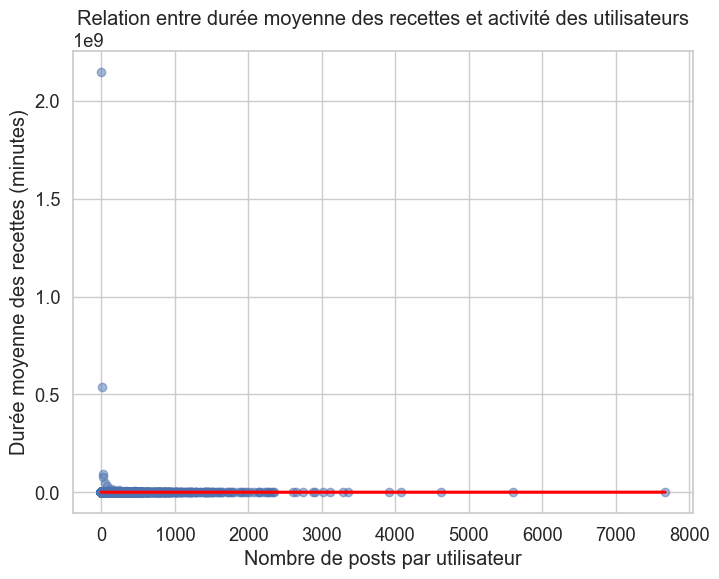

📈 Corrélation de Pearson : 0.000 (p-value = 0.8148)


In [ ]:
import ast
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# === 1️⃣ Charger les fichiers ===
df_recipes = pd.read_csv("Data/raw_recipes.csv")
df_interactions = pd.read_csv("Data/raw_interactions.csv")

# === 2️⃣ Calculer la durée moyenne des recettes par utilisateur ===
# Fusion sur recipe_id
df_merged = df_interactions.merge(
    df_recipes[['id', 'minutes']],
    left_on='recipe_id', right_on='id', how='inner'
)

# Durée moyenne des recettes par utilisateur
user_avg_duration = df_merged.groupby('user_id')['minutes'].mean().rename('avg_recipe_duration')

# === 3️⃣ Nombre d'interactions (posts) par utilisateur ===
user_activity = df_interactions.groupby('user_id')['recipe_id'].count().rename('nb_posts')

# === 4️⃣ Fusionner les deux indicateurs ===
user_metrics = pd.concat([user_avg_duration, user_activity], axis=1).dropna()

# === 5️⃣ Afficher les premières lignes ===
print("Aperçu des indicateurs utilisateurs :")
display(user_metrics.head())

# === 6️⃣ Régression linéaire ===
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(8,6))

# Scatter + droite de régression
sns.regplot(
    data=user_metrics, 
    x='nb_posts', 
    y='avg_recipe_duration', 
    scatter_kws={'alpha':0.5}, 
    line_kws={'color':'red'}
)

plt.title("Relation entre durée moyenne des recettes et activité des utilisateurs")
plt.xlabel("Nombre de posts par utilisateur")
plt.ylabel("Durée moyenne des recettes (minutes)")
plt.show()

# === 7️⃣ Calcul de corrélation (optionnel) ===
corr, pval = stats.pearsonr(user_metrics['nb_posts'], user_metrics['avg_recipe_duration'])
print(f"📈 Corrélation de Pearson : {corr:.3f} (p-value = {pval:.4f})")


Note moyenne des recettes par utilisateur

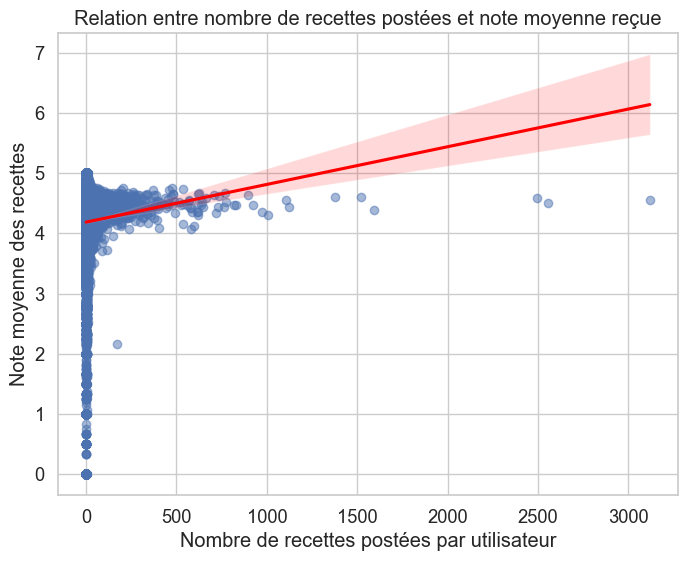

📈 Corrélation de Pearson : 0.030 (p-value = 0.0000)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# === 1️⃣ Charger les datasets ===
df_recipes = pd.read_csv("Data/raw_recipes.csv")
df_interactions = pd.read_csv("Data/raw_interactions.csv")

# === 2️⃣ Calculer le nombre de recettes postées par utilisateur ===
user_recipes = (
    df_recipes.groupby('contributor_id')['id']
    .count()
    .reset_index()
    .rename(columns={'id': 'nb_recipes', 'contributor_id': 'user_id'})
)

# === 3️⃣ Calculer la note moyenne reçue par utilisateur (auteur des recettes) ===
# On relie les interactions (notes) aux recettes (et donc à leurs auteurs)
df_merged = df_interactions.merge(
    df_recipes[['id', 'contributor_id']],
    left_on='recipe_id',
    right_on='id',
    how='inner'
)

user_avg_rating = (
    df_merged.groupby('contributor_id')['rating']
    .mean()
    .reset_index()
    .rename(columns={'contributor_id': 'user_id', 'rating': 'avg_rating'})
)

# === 4️⃣ Fusionner les deux indicateurs ===
user_stats = pd.merge(user_recipes, user_avg_rating, on='user_id', how='inner')

# === 5️⃣ Visualisation de la régression ===
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(8,6))

sns.regplot(
    data=user_stats,
    x='nb_recipes',
    y='avg_rating',
    scatter_kws={'alpha':0.5},
    line_kws={'color':'red'}
)

plt.title("Relation entre nombre de recettes postées et note moyenne reçue")
plt.xlabel("Nombre de recettes postées par utilisateur")
plt.ylabel("Note moyenne des recettes")
plt.show()

# === 6️⃣ Corrélation de Pearson ===
corr, pval = stats.pearsonr(user_stats['nb_recipes'], user_stats['avg_rating'])
print(f"📈 Corrélation de Pearson : {corr:.3f} (p-value = {pval:.4f})")


Relation entre nombre de recettes postées et taux de participation (avis)

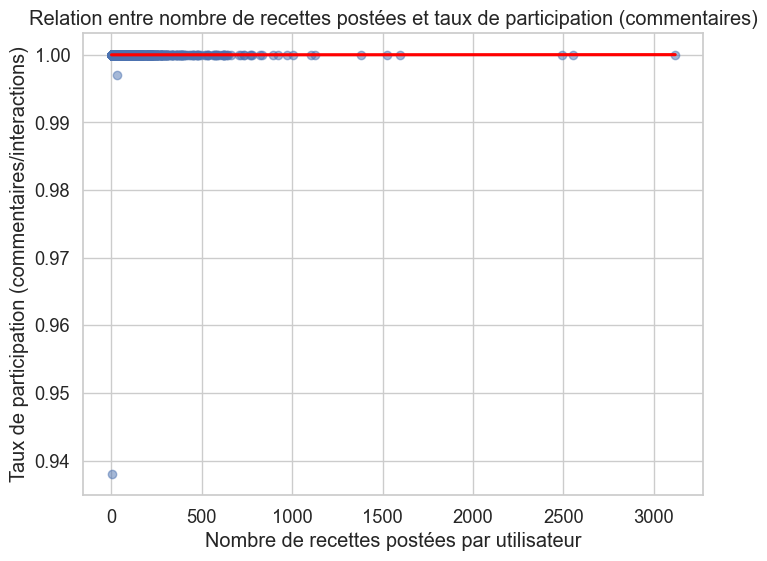

📈 Corrélation de Pearson : 0.001 (p-value = 0.8953)


In [ ]:
# === 1️⃣ Charger les datasets ===
df_recipes = pd.read_csv("Data/raw_recipes.csv")
df_interactions = pd.read_csv("Data/raw_interactions.csv")

# === 2️⃣ Nombre de recettes postées par utilisateur ===
user_recipes = (
    df_recipes.groupby('contributor_id')['id']
    .count()
    .reset_index()
    .rename(columns={'id': 'nb_recipes', 'contributor_id': 'user_id'})
)

# === 3️⃣ Calcul du taux de participation (commentaires postés / total d’interactions) ===
user_activity = (
    df_interactions.groupby('user_id')
    .agg(
        nb_comments=('review', lambda x: x.notna().sum()),  # nombre d'avis non nuls
        nb_interactions=('recipe_id', 'count')              # total de participations
    )
    .reset_index()
)

user_activity['comment_rate'] = (
    user_activity['nb_comments'] / user_activity['nb_interactions']
).round(3)

# === 4️⃣ Fusion des indicateurs ===
user_stats = pd.merge(user_recipes, user_activity, on='user_id', how='inner')

# === 5️⃣ Visualisation : Régression linéaire ===
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(8,6))

sns.regplot(
    data=user_stats,
    x='nb_recipes',
    y='comment_rate',
    scatter_kws={'alpha':0.5},
    line_kws={'color':'red'}
)

plt.title("Relation entre nombre de recettes postées et nombre d'avis postés")
plt.xlabel("Nombre de recettes postées par utilisateur")
plt.ylabel("Taux de participation (commentaires/interactions)")
plt.show()

# === 6️⃣ Corrélation de Pearson ===
corr, pval = stats.pearsonr(user_stats['nb_recipes'], user_stats['comment_rate'])
print(f"📈 Corrélation de Pearson : {corr:.3f} (p-value = {pval:.4f})")


In [ ]:
import pandas as pd
import ast
from collections import Counter
from IPython.display import display

# === 1️⃣ Chargement des datasets ===
df_recipes = pd.read_csv("Data/raw_recipes.csv")
df_interactions = pd.read_csv("Data/raw_interactions.csv")

# === 2️⃣ Conversion de la colonne 'tags' en liste Python ===
df_recipes['tags_list'] = df_recipes['tags'].apply(
    lambda x: ast.literal_eval(x) if pd.notnull(x) else []
)

# === 3️⃣ Fusion des interactions et des recettes sur 'recipe_id' ===
df_merged = df_interactions.merge(
    df_recipes[['id', 'tags_list']],
    left_on='recipe_id', right_on='id', how='inner'
)

# === 4️⃣ Identifier les utilisateurs les plus actifs ===
top_users = df_merged['user_id'].value_counts().head(10)
print("👥 Top 10 des utilisateurs les plus actifs :")
display(top_users)

# === 5️⃣ Identifier les tags associés à chaque utilisateur top ===
user_tags = {}

for user_id in top_users.index:
    # Récupérer tous les tags des recettes associées à cet utilisateur
    tags = [tag for tags_list in df_merged[df_merged['user_id'] == user_id]['tags_list'] for tag in tags_list]
    user_tags[user_id] = Counter(tags)

# === 6️⃣ Afficher les top tags pour chaque utilisateur actif ===
for user_id, tag_counter in user_tags.items():
    print(f"\n🏆 Top tags de l’utilisateur {user_id} :")
    df_user_tags = pd.DataFrame(tag_counter.most_common(10), columns=['Tag', 'Occurrences'])
    display(df_user_tags)

# === 7️⃣ (Optionnel) Fusionner les tags des top utilisateurs pour voir les plus fréquents globalement ===
all_top_tags = [tag for uid in top_users.index for tag in user_tags[uid]]
df_top_tags = pd.DataFrame(Counter(all_top_tags).most_common(20), columns=['Tag', 'Occurrences'])

print("\n🏷️ Tags les plus fréquents chez les utilisateurs les plus actifs :")
display(df_top_tags)


👥 Top 10 des utilisateurs les plus actifs :


user_id
424680    7671
37449     5603
383346    4628
169430    4076
128473    3917
89831     3353
58104     3288
133174    3107
199848    3018
305531    2902
Name: count, dtype: int64


🏆 Top tags de l’utilisateur 424680 :


,Tag,Occurrences
0,preparation,7634
1,time-to-make,7451
2,course,7261
3,main-ingredient,5254
4,dietary,5184
5,easy,4403
6,occasion,3805
7,low-in-something,3015
8,cuisine,2439
9,60-minutes-or-less,2225



🏆 Top tags de l’utilisateur 37449 :


,Tag,Occurrences
0,preparation,5588
1,time-to-make,5525
2,course,5305
3,dietary,4445
4,main-ingredient,4180
5,easy,3769
6,occasion,2886
7,low-in-something,2416
8,cuisine,2294
9,vegetables,2088



🏆 Top tags de l’utilisateur 383346 :


,Tag,Occurrences
0,preparation,4622
1,time-to-make,4550
2,course,4314
3,easy,3287
4,dietary,3061
5,main-ingredient,2896
6,occasion,2190
7,15-minutes-or-less,2057
8,3-steps-or-less,1861
9,low-in-something,1814



🏆 Top tags de l’utilisateur 169430 :


,Tag,Occurrences
0,preparation,4056
1,time-to-make,3958
2,course,3829
3,dietary,2786
4,main-ingredient,2757
5,easy,2352
6,occasion,1796
7,low-in-something,1628
8,cuisine,1622
9,3-steps-or-less,1177



🏆 Top tags de l’utilisateur 128473 :


,Tag,Occurrences
0,preparation,3897
1,time-to-make,3853
2,course,3690
3,main-ingredient,2635
4,dietary,2634
5,easy,2318
6,occasion,1913
7,cuisine,1681
8,low-in-something,1521
9,60-minutes-or-less,1094



🏆 Top tags de l’utilisateur 89831 :


,Tag,Occurrences
0,preparation,3342
1,time-to-make,3303
2,course,3207
3,main-ingredient,2502
4,dietary,2408
5,occasion,1726
6,easy,1693
7,cuisine,1259
8,low-in-something,1221
9,equipment,1036



🏆 Top tags de l’utilisateur 58104 :


,Tag,Occurrences
0,preparation,3279
1,time-to-make,3222
2,course,3140
3,main-ingredient,2452
4,dietary,2451
5,easy,1898
6,occasion,1707
7,cuisine,1572
8,low-in-something,1340
9,15-minutes-or-less,1123



🏆 Top tags de l’utilisateur 133174 :


,Tag,Occurrences
0,preparation,3096
1,time-to-make,3041
2,course,2939
3,main-ingredient,2492
4,dietary,2420
5,easy,1732
6,occasion,1468
7,low-in-something,1416
8,cuisine,1287
9,equipment,1046



🏆 Top tags de l’utilisateur 199848 :


,Tag,Occurrences
0,preparation,3014
1,time-to-make,2944
2,course,2854
3,main-ingredient,2609
4,dietary,2423
5,easy,1915
6,vegetables,1542
7,occasion,1398
8,low-in-something,1373
9,cuisine,1191



🏆 Top tags de l’utilisateur 305531 :


,Tag,Occurrences
0,preparation,2894
1,time-to-make,2832
2,course,2667
3,main-ingredient,2352
4,dietary,2032
5,easy,1869
6,occasion,1359
7,low-in-something,1316
8,cuisine,1227
9,meat,984



🏷️ Tags les plus fréquents chez les utilisateurs les plus actifs :


,Tag,Occurrences
0,30-minutes-or-less,10
1,time-to-make,10
2,course,10
3,preparation,10
4,occasion,10
5,sauces,10
6,condiments-etc,10
7,easy,10
8,heirloom-historical,10
9,holiday-event,10


Taux d’utilisation des tags les plus populaires par chaque utilisateur (à quel point un utilisateur utilise les tags “à la mode”) et le nombre de recettes qu’il poste.

Nombre de tags populaires (>=50 occurrences) : 123


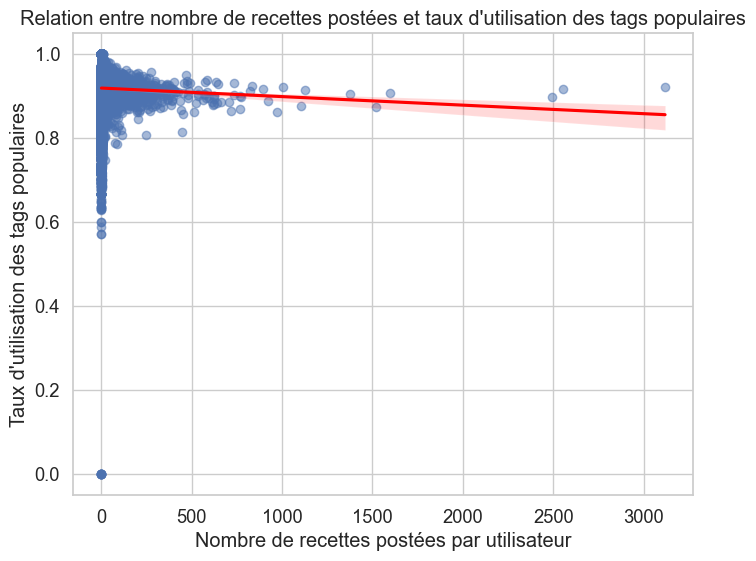

📈 Corrélation de Pearson : -0.017 (p-value = 0.0055)


In [ ]:
# === 1️⃣ Charger les données ===
df_recipes = pd.read_csv("Data/raw_recipes.csv")

# === 2️⃣ Nettoyer et convertir les tags en vraies listes ===
df_recipes['tags_list'] = df_recipes['tags'].apply(
    lambda x: ast.literal_eval(x) if pd.notnull(x) else []
)

# === 3️⃣ Identifier les tags les plus utilisés globalement ===
all_tags = [tag for tags in df_recipes['tags_list'] for tag in tags]
tag_counts = Counter(all_tags)
top_tags = [tag for tag, count in tag_counts.items() if count >= 5000]  # seuil ajustable
print(f"Nombre de tags populaires (>=50 occurrences) : {len(top_tags)}")

# === 4️⃣ Calculer le taux d’utilisation de ces tags par utilisateur ===
user_tag_usage = []

for user_id, user_df in df_recipes.groupby('contributor_id'):
    user_tags = [tag for tags in user_df['tags_list'] for tag in tags]
    if len(user_tags) == 0:
        usage_rate = 0
    else:
        popular_used = sum(tag in top_tags for tag in user_tags)
        usage_rate = popular_used / len(user_tags)
    user_tag_usage.append({'user_id': user_id, 'tag_usage_rate': usage_rate})

df_tag_usage = pd.DataFrame(user_tag_usage)

# === 5️⃣ Nombre de recettes postées par utilisateur ===
df_recipe_count = (
    df_recipes.groupby('contributor_id')['id']
    .count()
    .reset_index()
    .rename(columns={'contributor_id': 'user_id', 'id': 'nb_recipes'})
)

# === 6️⃣ Fusionner les deux indicateurs ===
df_user_stats = pd.merge(df_tag_usage, df_recipe_count, on='user_id', how='inner')

# === 7️⃣ Tracer la régression linéaire ===
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(8,6))

sns.regplot(
    data=df_user_stats,
    x='nb_recipes',
    y='tag_usage_rate',
    scatter_kws={'alpha':0.5},
    line_kws={'color':'red'}
)

plt.title("Relation entre nombre de recettes postées et taux d'utilisation des tags populaires")
plt.xlabel("Nombre de recettes postées par utilisateur")
plt.ylabel("Taux d'utilisation des tags populaires")
plt.show()

# === 8️⃣ Corrélation linéaire ===
corr, pval = stats.pearsonr(df_user_stats['nb_recipes'], df_user_stats['tag_usage_rate'])
print(f"📈 Corrélation de Pearson : {corr:.3f} (p-value = {pval:.4f})")


Définition des variables qui définissent un super contributeur : 
- Nombre de recettes postées
- Nombre d'avis postés
- Moyenne des notes reçues sur les recettes postées


In [ ]:
# Harmoniser les index sur 'user_id'
recipes_per_user = (
    df_recipes.groupby('contributor_id')['id'].count()
    .rename('nb_recipes')
    .rename_axis('user_id')
)

avg_time = (
    df_recipes.groupby('contributor_id')['minutes'].mean()
    .rename('avg_duration')
    .rename_axis('user_id')
)

merged = df_interactions.merge(
    df_recipes[['id', 'contributor_id']],
    left_on='recipe_id', right_on='id', how='inner'
)

avg_rating_received = (
    merged.groupby('contributor_id')['rating'].mean()
    .rename('avg_rating_received')
    .rename_axis('user_id')
)

# Avis postés par ces mêmes personnes (les contributeurs qui commentent aussi)
reviews_per_user = (
    df_interactions.groupby('user_id')['review'].count()
    .rename('nb_reviews_posted')
)

# Assure-toi que user_tag_usage_df est indexé par 'user_id'
# user_tag_usage_df = user_tag_usage_df.set_index('user_id')  # si besoin

user_profile = (
    recipes_per_user.to_frame()
    .join(avg_time, how='left')
    .join(avg_rating_received, how='left')
    .join(reviews_per_user, how='left')
    .join(user_tag_usage_df, how='left')  # optionnel
    .fillna(0)
)

# Normalisation simple min-max avant score (exemple)
for col in ['nb_recipes','nb_reviews_posted','avg_rating_received']:
    col_min, col_max = user_profile[col].min(), user_profile[col].max()
    if col_max > col_min:
        user_profile[col + '_mm'] = (user_profile[col] - col_min) / (col_max - col_min)
    else:
        user_profile[col + '_mm'] = 0

user_profile['contrib_score'] = (
    0.5 * user_profile['nb_recipes_mm'] +
    0.3 * user_profile['nb_reviews_posted_mm'] +
    0.2 * user_profile['avg_rating_received_mm']
)


NameError: name 'user_tag_usage_df' is not defined